# Example using bqplot
[bqplot](https://github.com/bloomberg/bqplot) is an interactive framework for the Jupyter Notebook. Together with vaex it enables interactive plots, meaning you can zoom in and out, and do selections from the plot. The plot will also update for instance when you change the selection programmatically (Using [Dataset.select](vaex.html#vaex.dataset.Dataset.select) ), or when done from the gui.

## Installing bqplot
See [bqplot installation instructions](https://github.com/bloomberg/bqplot#installation), or for pip:
```
$ pip install bqplot
$ jupyter nbextension enable --py bqplot
```
And anaconda/conda
```
$ conda install -c conda-forge bqplot
```

In [1]:
# only used in develop mode (remove this)
%load_ext autoreload
%autoreload 2

In [24]:
import vaex as vx
import ipywidgets as widgets
import numpy as np

In [40]:
# use the taxi dataset
ds = vx.datasets.nyctaxi_2015_jan.get()
# or do whole 2015
# ds = vx.datasets.nyctaxi_2015.get()
# we'll show pickup and dropoff locations
pickups = ds("pickup_longitude", "pickup_latitude")
dropoffs = ds("dropoff_longitude", "dropoff_latitude")
# default region we'll look at
geo_limits = lonrange, latrange = (-74.0655186833, -73.8048761181), (40.6444424556, 40.9050850209)
print "{:,} rows".format(len(ds))

12,748,986 rows


In [41]:
(w1.__class__.__base__)

ipywidgets.widgets.domwidget.DOMWidget

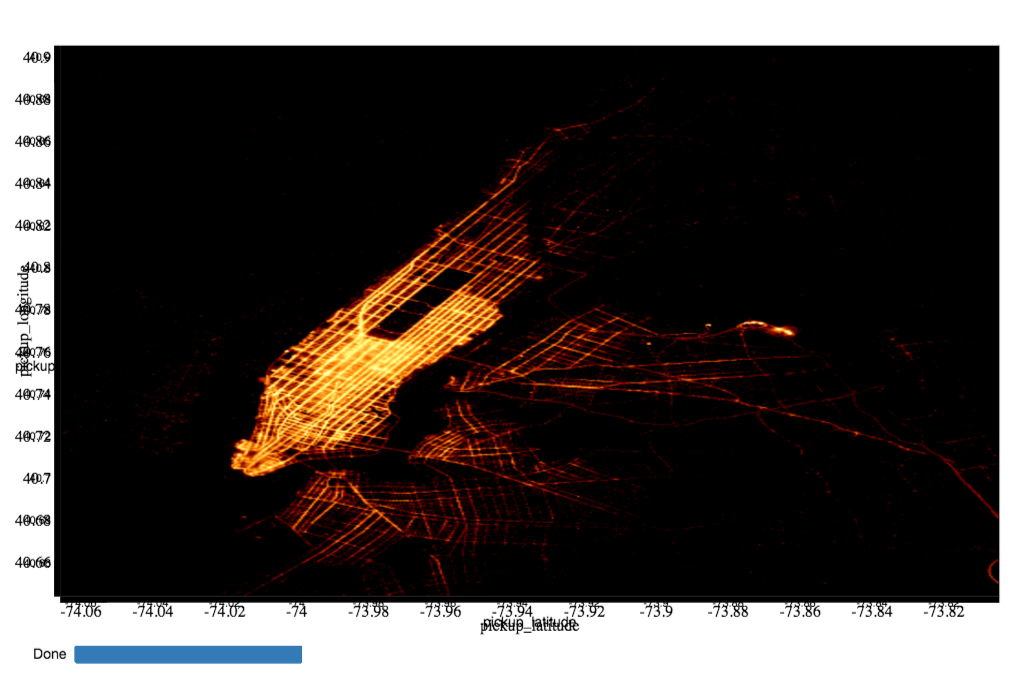

In [44]:
pickups.plot_bq(size=512, limits=geo_limits, f=np.log1p)

# Example 2
We will now plot both the pickup and dropoff locations, link their scales (see bqplot documentation), and enable selections (using tool_select=True). When a selection is made, the plot will be updated.

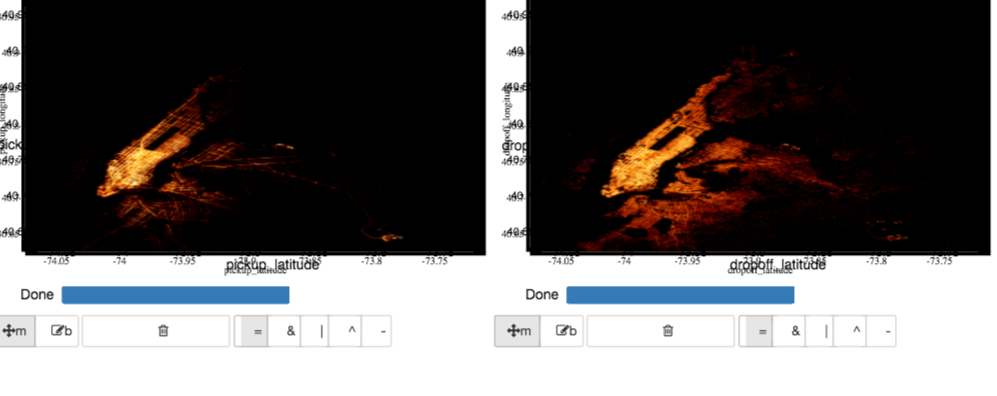

In [51]:
size = 512
# plot bq returns a ipywigets VBox object, the first child object is the figure, and we use that to connect
# the scales of the two figures
w1 = pickups.plot_bq(size=size, limits=geo_limits, tool_select=True, title="Pickups", f=np.log1p)
fig = w1.children[0]
scales = fig.marks[-1].scales
w2 = dropoffs.plot_bq(size=size, limits=geo_limits, tool_select=True, scales=scales, title="Dropoffs", f=np.log1p)
widgets.HBox([w1, w2])

In [54]:
# selecting work dropoff hours
ds.select("(pickup_hour >= 7) & (pickup_hour <= 9)")

In [55]:
# here is where the nightlive is
ds.select("(pickup_hour >= 23) | (pickup_hour <= 4)")